In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv("/kaggle/input/bbc-articles-dataset/bbc_text_cls.csv")
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


(                                                text    labels
 0  Ad sales boost Time Warner profit\n\nQuarterly...  business
 1  Dollar gains on Greenspan speech\n\nThe dollar...  business
 2  Yukos unit buyer faces loan claim\n\nThe owner...  business
 3  High fuel prices hit BA's profits\n\nBritish A...  business
 4  Pernod takeover talk lifts Domecq\n\nShares in...  business,
 None)

In [2]:
#length of articles:

df['word_count'] = df['text'].apply(lambda x: len(x.split()))

avg_word_count_per_label = df.groupby('labels')['word_count'].mean()

print(df[['text', 'labels', 'word_count']].head())


                                                text    labels  word_count
0  Ad sales boost Time Warner profit\n\nQuarterly...  business         421
1  Dollar gains on Greenspan speech\n\nThe dollar...  business         384
2  Yukos unit buyer faces loan claim\n\nThe owner...  business         264
3  High fuel prices hit BA's profits\n\nBritish A...  business         406
4  Pernod takeover talk lifts Domecq\n\nShares in...  business         265


<Axes: xlabel='word_count', ylabel='Count'>

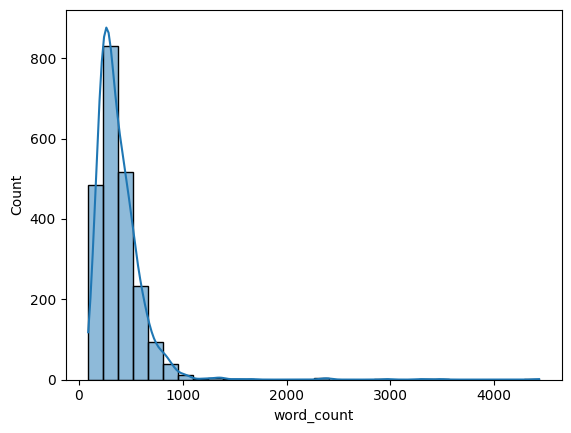

In [3]:
sns.histplot(data=df, x='word_count', bins=30, kde=True)

In [4]:
print("\nAverage word count per label:")
print(avg_word_count_per_label)


Average word count per label:
labels
business         328.880392
entertainment    330.621762
politics         453.973621
sport            329.262231
tech             502.695761
Name: word_count, dtype: float64


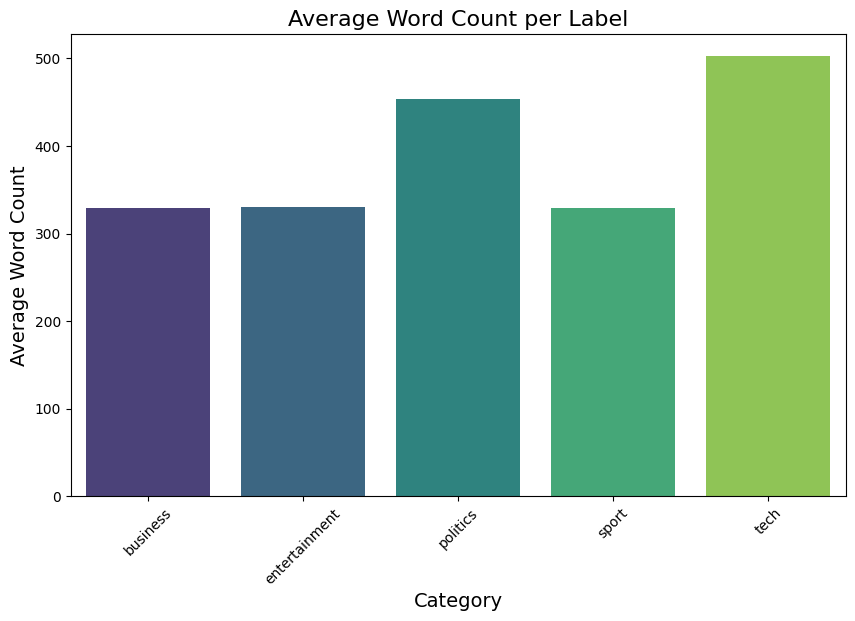

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_word_count_per_label.index, y=avg_word_count_per_label.values, palette='viridis')
plt.title('Average Word Count per Label', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Word Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Text Classification using Logistic Regression

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Splitting the dataset into training and testing sets
X = df['text']
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing the text using TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Training the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluating the model performance
report = classification_report(y_test, y_pred, target_names=df['labels'].unique())


In [7]:
#printing the performance

print("Classification Report:\n")
print(report)

Classification Report:

               precision    recall  f1-score   support

     business       0.94      0.98      0.96       115
entertainment       0.99      0.96      0.97        72
     politics       0.97      0.96      0.97        76
        sport       1.00      0.99      1.00       102
         tech       0.96      0.95      0.96        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



# Key Metrics:
*Definitions*

Precision: This indicates the proportion of true positive predictions among all positive predictions made for each class. High precision means fewer false positives.

Recall: This measures the proportion of true positives that were correctly predicted out of all actual positives. High recall means fewer false negatives.

F1-Score: This is the harmonic mean of precision and recall. It provides a balanced metric when there's an uneven class distribution or when precision and recall are not equally important.

Support: This is the number of true instances of each class in the test set.

Macro Average: This is the average precision, recall, and F1-score across all classes, treating each class equally.

Weighted Average: This is the average weighted by the support (the number of instances) for each class.


*Formulas Used:*

**Precision** = TP/TP+FP

**Recall** = TP/TP+FN
 
**F1-Score** = 2×Precision×Recall/Precision+Recall
 




# Conclusions:

Each class in the dataset is evaluated individually with these metrics.

**Business:**
Precision: 94% of the predictions labeled as "business" were actually "business."
Recall: 98% of all actual "business" articles were correctly predicted.
F1-Score: 96%, a balance of precision and recall.

**Entertainment:**
Precision: 99%, very few false positives.
Recall: 96%, meaning only 4% of actual "entertainment" articles were missed.
F1-Score: 97%, indicating overall excellent performance.

**Politics:**
Precision and Recall are both 97% and 96%, indicating that the model does well in identifying and predicting "politics" articles.

**Sport:**
Precision is perfect at 100%, meaning all articles predicted as "sport" were correct.
Recall is also high (99%), suggesting almost no missed "sport" articles.
F1-Score is 100%, showing optimal balance between precision and recall.

**Tech:**
Precision: 96%, Recall: 95%, F1-Score: 96%, showing strong performance for tech articles as well.


**Overall Metrics:**
Accuracy: 97%. This is the proportion of correctly predicted articles across all categories.

The macro avg F1-score is 97%, meaning that across all classes, the model performs very well.

The weighted avg F1-score is also 97%, reflecting strong performance while accounting for the fact that some classes (like "business") have more instances than others (like "entertainment").


**Summary:**
The model is performing excellently, with all classes achieving high precision, recall, and F1-scores. The model's overall accuracy is 97%, meaning it's predicting most articles correctly, with minimal false positives or negatives across all categories.